# Load Dataset

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("StudentsPerformance.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [107]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['average score'] >= 50

print(df.head())

# featurs/input variables
features = ['math score', 'reading score', 'writing score']
X = df[features]

# targets/output variables
y_class = df['pass']
y_reg = df['math score']

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   average score   pass  
0      72.666667   True  
1      82.333333   True  
2      92.666667   True  
3      49.333333  False  
4      76.333333   Tru

# Classification

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split dataset into training and testing
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, random_state=42, train_size=0.75)

# make an instance of the model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train_class)

# predict
y_pred_class = clf.predict(X_test)
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Classification Accuracy: ", accuracy)

Classification Accuracy:  0.984


# Regression

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, random_state=42, train_size=0.75)

reg = LinearRegression()
reg = reg.fit(X_train, y_train_reg)

y_pred_reg = reg.predict(X_test)
accuracy = mean_squared_error(y_test_reg, y_pred_reg)
print("Regression MSE: ", accuracy)

Regression MSE:  5.240703652838961e-28


## Classification Scatter Plot

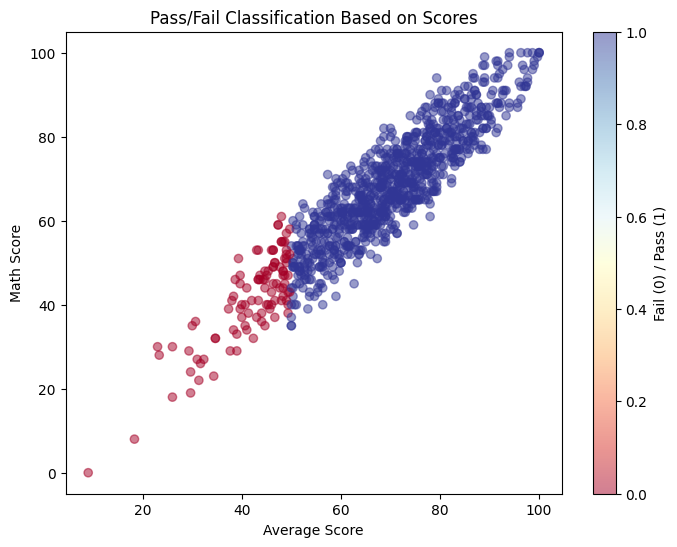

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plot = plt.scatter(df['average score'], df['math score'], c=df['pass'], cmap='RdYlBu', alpha=0.5)
plt.xlabel("Average Score")
plt.ylabel("Math Score")
plt.title("Pass/Fail Classification Based on Scores")
plt.colorbar(label='Fail (0) / Pass (1)')
plt.show()


## Classification Confusion Matrix

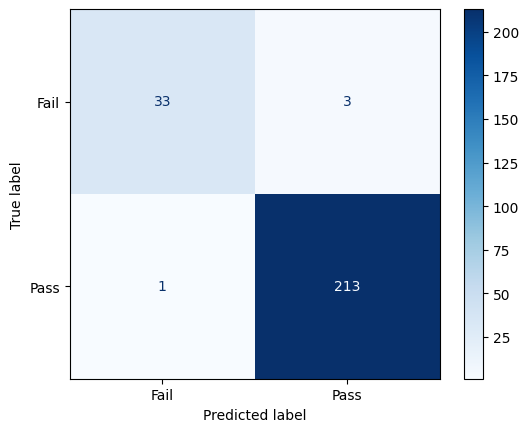

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')
plt.show()
